In [1]:
import pandas as pd

## Series
https://khashtamov.com/ru/pandas-introduction/

In [4]:
my_series = pd.Series({'qweq': [5, 6, 7, 8, 9, 10]})
my_series

qweq    [5, 6, 7, 8, 9, 10]
dtype: object

In [25]:
my_series3 = pd.Series({'a': 5, 'b': 6, 'c': 7, 'd': 8})
my_series3

a    5
b    6
c    7
d    8
dtype: int64

У объекта Series есть атрибуты через которые можно
получить список элементов и индексы, это values и index соответственно

In [ ]:
print(my_series.index)
print(my_series.values)

Доступ к элементам объекта Series возможны по их индексу

In [10]:
my_series[5]

10

Индексы можно задавать явн

In [14]:
my_series2 = pd.Series(range(5,11),index=['a','b','c','d',
                                          'e','f'])
print(my_series2)
my_series2['f']

a     5
b     6
c     7
d     8
e     9
f    10
dtype: int64


10

Доступ по нескольким индексам и осуществлять групповое присваивание

In [19]:
my_series2[['e','f']]
my_series2[['e','f']] = 0
my_series2

a    5
b    6
c    7
d    8
e    0
f    0
dtype: int64

Фильтровать Series

In [22]:
my_series2[my_series2 > 0][my_series2 < 8]

a    5
b    6
c    7
dtype: int64

In [23]:
my_series2[my_series2>3]*2

a    10
b    12
c    14
d    16
dtype: int64

У объекта Series и его индекса есть атрибут name

In [31]:
my_series3.name = 'цифры'
my_series3.index.name = 'litter'
# my_series3.values.name = 'number'
my_series3

litter
a    5
b    6
c    7
d    8
Name: цифры, dtype: int64

У объекта Series Индекс можно поменять "на лету"

In [33]:
my_series3.index = ['A', 'B', 'C', 'D']
my_series3



A    5
B    6
C    7
D    8
Name: цифры, dtype: int64

In [34]:
my_series3.reset_index()
my_series3

A    5
B    6
C    7
D    8
Name: цифры, dtype: int64

## DataFrame

In [37]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]})

df

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600
3,Ukraine,45.50,603628


## Чтобы убедиться, что столбец в DataFrame это Series, извлекаем

In [40]:
print(type(df.country))
print(type(df['country']))
df.country

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


0    Kazakhstan
1        Russia
2       Belarus
3       Ukraine
Name: country, dtype: object

Доступ по индексу в DataFrame

In [43]:
df.index = ['KZ', 'RU', 'BY', 'UA']
df.index.name = 'Coun_cod'
df

,country,population,square
Coun_cod,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [58]:
df1 = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]})


In [84]:
print(df1)
print('*'*10,'')
print(df1.loc[:,'population'])
df1.iloc[:2,1:2]


      country  population    square
0  Kazakhstan       17.04   2724902
1      Russia      143.50  17125191
2     Belarus        9.50    207600
3     Ukraine       45.50    603628
********** 
0     17.04
1    143.50
2      9.50
3     45.50
Name: population, dtype: float64


,population
0,17.04
1,143.50


In [66]:
print(df)
df.loc['KZ':'BY']

             country  population    square
Coun_cod                                  
KZ        Kazakhstan       17.04   2724902
RU            Russia      143.50  17125191
BY           Belarus        9.50    207600
UA           Ukraine       45.50    603628


,country,population,square
Coun_cod,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600


Фильтровать DataFrame


In [88]:
df =df.reset_index()
df



,Coun_cod,country,population,square
0,KZ,Kazakhstan,17.04,2724902
1,RU,Russia,143.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


In [91]:
type(df['country'])

pandas.core.series.Series

In [95]:
df['dennsity'] = df.population/df.square
del df['dennsity']
df

,Coun_cod,country,population,square
0,KZ,Kazakhstan,17.04,2724902
1,RU,Russia,143.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


In [96]:
df = df.rename(columns={'Country Code': 'country_code'})
df


,Coun_cod,country,population,square
0,KZ,Kazakhstan,17.04,2724902
1,RU,Russia,143.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


In [104]:
path2 = r'C:\Users\egor\Downloads\titanic.csv'

df = pd.read_csv(path2)
df.head(1)

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1


In [113]:
# df.groupby(['Sex', 'Survived']).count()
# df.groupby(['Sex'])['PassengerID'].count()
df.groupby(['Sex', 'Survived'])[['PassengerID']].count()

PassengerID
Sex    Survived             
female 0                 154
       1                 308
male   0                 709
       1                 142

In [115]:
df.groupby(['PClass', 'Survived'])[['PassengerID']].count()



PassengerID
PClass Survived             
*      0                   1
1st    0                 129
       1                 193
2nd    0                 160
       1                 119
3rd    0                 573
       1                 138

In [116]:
df.groupby(['Sex','PClass']).count()

PassengerID  Name  Age  Survived  SexCode
Sex    PClass                                           
female 1st             143   143  101       143      143
       2nd             107   107   85       107      107
       3rd             212   212  102       212      212
male   *                 1     1    0         1        1
       1st             179   179  125       179      179
       2nd             172   172  127       172      172
       3rd             499   499  216       499      499

In [123]:
pdf = df.pivot_table(index='Sex', columns='PClass' , values='Name', aggfunc = 'count'  )
pdf

# da = data.pivot_table(index = 'userId', columns = 'rating',
#                     values = 'timestamp', aggfunc = 'count', fill_value = 0, margins = True)

PClass,*,1st,2nd,3rd
Sex,,,,
female,NaN,143.0,107.0,212.0
male,1.0,179.0,172.0,499.0


In [130]:
pdf.loc['female',['1st','3rd']]

PClass
1st    143.0
3rd    212.0
Name: female, dtype: float64

In [180]:
apple = pd.read_csv(r'C:\Users\egor\Downloads\apple.csv')

apple.info()
apple.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


,Date,Open,High,Low,Close,Volume,Adj Close
1253,2012-02-29,541.560005,547.610023,535.700005,542.440025,238002800,70.278286
1254,2012-02-28,527.960014,535.410011,525.850006,535.410011,150096800,69.367481
1255,2012-02-27,521.309982,528.500000,516.280014,525.760017,136895500,68.117232
1256,2012-02-24,519.669998,522.899979,518.640015,522.409981,103768000,67.683203
1257,2012-02-23,515.079987,517.830009,509.499992,516.389977,142006900,66.903253


In [181]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   int64         
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


Установить столбец, в качестве индекса

In [186]:
# apple = apple.set_index(['Date'])
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-02-22 to 2012-02-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   int64  
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [203]:
# apple.loc['2012-Feb',['Open','Close']]

apple['avg_open_close'] = apple.apply(lambda x: (x['Open']+x['Close'])/2, axis=1)
apple.loc['2017-02',['Open','Close', 'avg_open_close']]

,Open,Close,avg_open_close
Date,,,
2017-02-22,136.429993,137.110001,136.769997
2017-02-21,136.229996,136.699997,136.464996
2017-02-17,135.100006,135.720001,135.410004
2017-02-16,135.669998,135.350006,135.510002
2017-02-15,135.520004,135.509995,135.514999
2017-02-14,133.470001,135.020004,134.245002
2017-02-13,133.080002,133.289993,133.184998
2017-02-10,132.460007,132.119995,132.290001
2017-02-09,131.649994,132.419998,132.034996


In [219]:
apple.resample('M')['Close'].mean().head(100)


Date
2012-02-29    528.482002
2012-03-31    577.507727
2012-04-30    606.002999
2012-05-31    564.673179
2012-06-30    574.562378
                 ...    
2016-10-31    115.707143
2016-11-30    110.154285
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    132.897332
Freq: M, Name: Close, Length: 61, dtype: float64

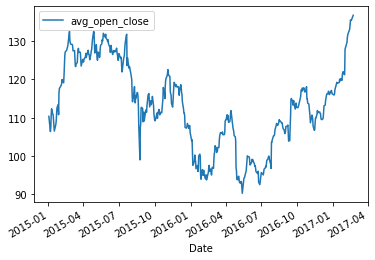

In [217]:
from matplotlib import pyplot as plt
new_sample = apple.loc['2017':'2015',['avg_open_close']]
new_sample.plot()
plt.show()


